## EDA

In [5]:
import pandas as pd
import numpy as np

# Load data
data = pd.read_csv("Project-II/Fraud.csv")
print(data.head())

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


In [6]:
# Compute the dimensions of the data set
size,dim = data.shape
print(f"There are {size} online payments and {dim} variables.")
data = data.drop('isFlaggedFraud', axis=1) #?
print(data.head())

There are 6362620 online payments and 11 variables.
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  
0  M1979787155             0.0             0.0        0  
1  M2044282225             0.0             0.0        0  
2   C553264065             0.0             0.0        1  
3    C38997010         21182.0             0.0        1  
4  M1230701703             0.0             0.0        0  


In this case, our target variable is the binary **isFraud** that takes value 1 is the online payment was a fraud and 0 otherwise.

### Missing values

In [7]:
# Check for missing data
print(data.isnull().sum())

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64


### Quality check

We check if the columns are saved in an approepriate format.

In [16]:
# Check data types
data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

Note that the target variable *isFraud* is saved as an integer, but it should only have two possibilities either 0 or 1. In addition, to improve efficiency, we change the format of the categorical variables from *object* to *category*. The *category* type assigns each category to an numberic value, which saves memory.

In [8]:
# Define the numerical and categorical columns
numerical_cols = ['step', 'amount', 'oldbalanceOrg',
                  'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
categorical_cols = ['type', 'nameOrig', 'nameDest', 'isFraud']

# Change the type of categorical columns from object to category
for col in categorical_cols:
    data[col] = data[col].astype('category')

data.dtypes # check

step                 int64
type              category
amount             float64
nameOrig          category
oldbalanceOrg      float64
newbalanceOrig     float64
nameDest          category
oldbalanceDest     float64
newbalanceDest     float64
isFraud           category
dtype: object

We see that the data is complete since no values are missing in none of the columns. It is quite rare given the large size of the data.

Furthermore we want to have an initial intuition of the values that each variable take. For the numerical variables we will display the main statistics and for the categorical we look for all the possible categories it takes.

In [18]:
# Display main statistics for numeric variables
data[numerical_cols].describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


In [19]:
for col in categorical_cols:
    #print(data[col].value_counts())
    print(f"variable: {col}\n Number of categories: {len(data[col].unique())} \n Categories: {data[col].value_counts()}\n") 

variable: type
 Number of categories: 5 
 Categories: type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64



variable: nameOrig
 Number of categories: 6353307 
 Categories: nameOrig
C363736674     3
C724452879     3
C2051359467    3
C1976208114    3
C2098525306    3
              ..
C1645324143    1
C1645323789    1
C1645322804    1
C1645322647    1
C1645327442    1
Name: count, Length: 6353307, dtype: int64

variable: nameDest
 Number of categories: 2722362 
 Categories: nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C1590550415    101
              ... 
M1576076331      1
M1576076451      1
M157607653       1
M157607921       1
M1576071739      1
Name: count, Length: 2722362, dtype: int64

variable: isFraud
 Number of categories: 2 
 Categories: isFraud
0    6354407
1       8213
Name: count, dtype: int64



### Univariate distribution

We are now interested in plotting the distribution of each variable. We start with the numerical variables showing an historhgram and the estimate density.

In [8]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.433972e+02  1.798619e+05   8.338831e+05    8.551137e+05   
std    1.423320e+02  6.038582e+05   2.888243e+06    2.924049e+06   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    7.430000e+02  9.244552e+07   5.958504e+07    4.958504e+07   

       oldbalanceDest  newbalanceDest  
count    6.362620e+06    6.362620e+06  
mean     1.100702e+06    1.224996e+06  
std      3.399180e+06    3.674129e+06  
min      0.000000e+00    0.000000e+00  
25%      0.000000e+00    0.000000e+00  
50%      1.327057e+05    2.146614e+05  
75%      9.430367e+05    1.111909e+06  
max      3.560159e+08    3.561793e+08  


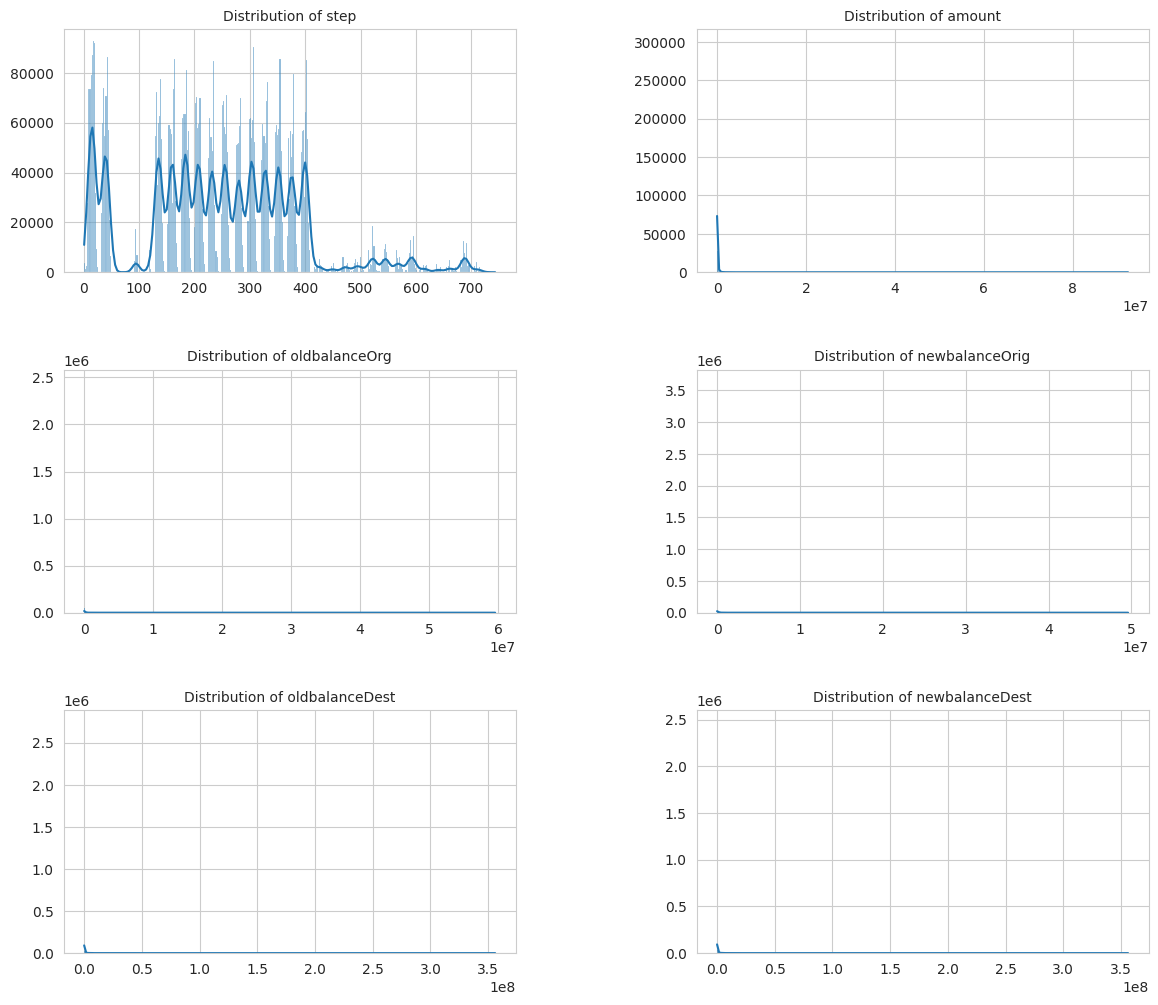

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set_style("whitegrid")

# Descriptive statistics for numerical features
descriptive_stats = data[numerical_cols].describe()
print(descriptive_stats)

# Plotting distributions for numerical features
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4) # spacing between subplots

for i, col in enumerate(numerical_cols):
    sns.histplot(data[col], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {col}', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')

We move on to the categorical variables now. In this case we use some barplots to display the counts of each category.

In [15]:
# Plotting distributions for categorical features
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 12))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, col in enumerate(categorical_cols):
    sns.countplot(data=data, x=col, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'Distribution of {col}', fontsize=10)
    axes[i//2, i%2].set_xlabel('')
    axes[i//2, i%2].set_ylabel('')
    axes[i//2, i%2].tick_params(axis='x', rotation=45)

plt.tight_layout()

### Bivariate analysis

In [14]:
type = data["type"].value_counts()
transactions = type.index
quantity = type.values

import plotly.express as px
figure = px.pie(data,
             values=quantity,
             names=transactions,hole = 0.5,
             title="Distribution of Transaction Type")
figure.show()

ModuleNotFoundError: No module named 'plotly'

In [9]:
data["type"] = data["type"].map({"CASH_OUT": 1, "PAYMENT": 2,
                                 "CASH_IN": 3, "TRANSFER": 4,
                                 "DEBIT": 5})
#data["isFraud"] = data["isFraud"].map({0: "No Fraud", 1: "Fraud"})
print(data.head())

   step type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1    2   9839.64  C1231006815       170136.0       160296.36   
1     1    2   1864.28  C1666544295        21249.0        19384.72   
2     1    4    181.00  C1305486145          181.0            0.00   
3     1    1    181.00   C840083671          181.0            0.00   
4     1    2  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest isFraud  
0  M1979787155             0.0             0.0       0  
1  M2044282225             0.0             0.0       0  
2   C553264065             0.0             0.0       1  
3    C38997010         21182.0             0.0       1  
4  M1230701703             0.0             0.0       0  


### Cross-correlations

In order to identify possible linear relationships between the numerical variables, correlation coefficients can be analyzed. In the following we find a heatmap with all the pair-wise correlations.

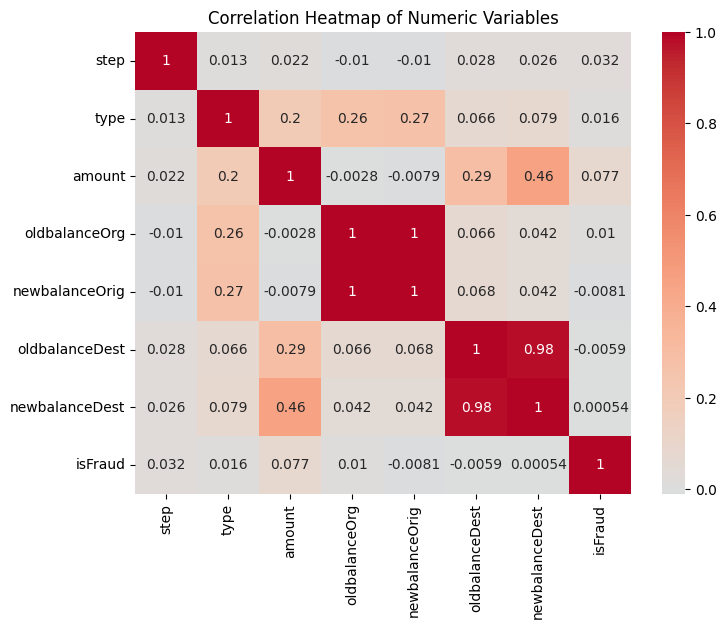

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix
correlation = data.iloc[:,[0,1,2,4,5,7,8,9]].corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

In [10]:
# Checking correlation
correlation = data.iloc[:,[0,1,2,4,5,7,8,9]].corr()
print(correlation["isFraud"].sort_values(ascending=False))

isFraud           1.000000
amount            0.076688
step              0.031578
type              0.016171
oldbalanceOrg     0.010154
newbalanceDest    0.000535
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
Name: isFraud, dtype: float64


In [10]:
data["isFraud"] = data["isFraud"].map({0: "No", 1: "Yes"})

### Feature selection

In [11]:
from sklearn.preprocessing import LabelEncoder

# encode categorical variables
le = LabelEncoder()
encoded_data = data.apply(lambda col: le.fit_transform(col) if col.dtype == 'category' else col)

In [12]:
# Split the target and features
X_enc = encoded_data.drop(columns=['isFraud'])
y_enc = encoded_data['isFraud'] # target

print(X_enc.head())
print(y_enc.head())

   step  type    amount  nameOrig  oldbalanceOrg  newbalanceOrig  nameDest  \
0     1     1   9839.64    757869       170136.0       160296.36   1662094   
1     1     1   1864.28   2188998        21249.0        19384.72   1733924   
2     1     3    181.00   1002156          181.0            0.00    439685   
3     1     0    181.00   5828262          181.0            0.00    391696   
4     1     1  11668.14   3445981        41554.0        29885.86    828919   

   oldbalanceDest  newbalanceDest  
0             0.0             0.0  
1             0.0             0.0  
2             0.0             0.0  
3         21182.0             0.0  
4             0.0             0.0  
0    0
1    0
2    1
3    1
4    0
Name: isFraud, dtype: int64


In [14]:
from sklearn.tree import DecisionTreeClassifier

# create a random forest classifier model
rf_model = DecisionTreeClassifier(random_state=42)
rf_model.fit(X_enc, y_enc)

# get feature importance
feature_importance = rf_model.feature_importances_

# create a dataframe for visualization of feature importance
features_df = pd.DataFrame({'Feature': X_enc.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))  # displaying the top 10 important features

#X = X[list(features_df["Feature"][:2])]

          Feature  Importance
4   oldbalanceOrg    0.382342
8  newbalanceDest    0.233694
2          amount    0.138838
7  oldbalanceDest    0.110176
0            step    0.055428
5  newbalanceOrig    0.042682
6        nameDest    0.014269
3        nameOrig    0.013230
1            type    0.009341


In [3]:
from sklearn.tree import DecisionTreeClassifier

# create a random forest classifier model
rf_model = DecisionTreeClassifier(random_state=42)
rf_model.fit(X_enc, y_enc)

# get feature importance
feature_importance = rf_model.feature_importances_

# create a dataframe for visualization of feature importance
features_df = pd.DataFrame({'Feature': X_enc.columns, 'Importance': feature_importance})
features_df = features_df.sort_values(by='Importance', ascending=False)

print(features_df.head(10))  # displaying the top 10 important features

#X = X[list(features_df["Feature"][:2])]

NameError: name 'X_enc' is not defined

### Oline payments Fraud Dtection models

In [16]:
from sklearn.model_selection import train_test_split

# splitting the data
X = np.array(data[["type", "amount", "oldbalanceOrg", "newbalanceOrig"]])
y = np.array(data[["isFraud"]])

# training a decision tree
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

### Decision trees

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Confusion matrix:",confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred, pos_label='Yes'))

Confusion matrix: [[635367     78]
 [    90    727]]
Accuracy: 0.9997359578286932
Sensitivity (Recall): 0.8898408812729498


In [14]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Manually specify class weights (e.g., more weight to 'yes' class)
class_weights = {'No': 1, 'Yes': 10}  # Adjust the weight of the 'yes' class as needed
clf = DecisionTreeClassifier(random_state=42, class_weight=class_weights)
# try different hyper-parameters: criterion='gini', max_depth=None, min_samples_split=2

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Display results
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred, pos_label='Yes'))

[[635373     72]
 [   102    715]]
Accuracy: 0.9997265277511466
Sensitivity (Recall): 0.8751529987760098


In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Manually specify class weights (e.g., more weight to 'yes' class)
class_weights = {'No': 1, 'Yes': 1000}  # Adjust the weight of the 'yes' class as needed
clf = DecisionTreeClassifier(random_state=42, class_weight=class_weights)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Display results
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred, pos_label='Yes'))

[[635376     69]
 [    90    727]]
Accuracy: 0.9997501029450132
Sensitivity (Recall): 0.8898408812729498


The sensitivity is improving, while the decrease in the accuracy is insignificant.

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Automatically balance class weights
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Display results
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred, pos_label='Yes'))

[[635379     66]
 [    94    723]]
Accuracy: 0.9997485312654221
Sensitivity (Recall): 0.8849449204406364


In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score

# Automatically balance class weights
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Display results
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred))

NameError: name 'X_train' is not defined

In [5]:
# Decision trees: Balanced classes

from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Automatically balance class weights
clf = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Define the parameter grid to search
param_grid = {
    'max_depth': [2, 4, 6],  # Max depth of the tree
    'min_samples_split': [2, 4, 6],   # Minimum number of samples required to split a node
         # Minimum number of samples required at each leaf node 'min_samples_leaf': [1, 2, 4],
}

# Define the scoring function (You may want to use recall since you mentioned balanced classes)
scorer = make_scorer(recall_score, pos_label='Yes')

# Perform grid search
grid_search = GridSearchCV(clf, param_grid, scoring=scorer, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Make predictions with the best estimator
y_pred = best_estimator.predict(X_test)

# Display results
print("Best Parameters:", best_params)
print("Recall (Sensitivity) with Best Estimator:", recall_score(y_test, y_pred, pos_label='Yes'))

NameError: name 'X_train' is not defined

### Logistic regression

In [11]:
from sklearn.linear_model import LogisticRegression

# Create a LogisticRegression model
clf = LogisticRegression(random_state=42, max_iter=1000)

# they require scaling

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Display results
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred, pos_label='Yes'))

ValueError: could not convert string to float: 'CASH_OUT'

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, classification_report

# Ensure y_train and y_test are 1D arrays
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Create a LogisticRegression model
clf = LogisticRegression(random_state=42, max_iter=1000, class_weight='balanced')

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
clf.fit(X_train_scaled, y_train)

# Make predictions
y_pred_reg = clf.predict(X_test_scaled)

# Display results
print(confusion_matrix(y_test, y_pred_reg))
print("Accuracy:", accuracy_score(y_test, y_pred_reg))
print("Sensitivity (Recall):", recall_score(y_test, y_pred_reg, pos_label='Yes'))
print("Classification Report:")
print(classification_report(y_test, y_pred_reg))

[[610190  25255]
 [   113    704]]
Accuracy: 0.9601296321326749
Sensitivity (Recall): 0.8616891064871481
Classification Report:
              precision    recall  f1-score   support

          No       1.00      0.96      0.98    635445
         Yes       0.03      0.86      0.05       817

    accuracy                           0.96    636262
   macro avg       0.51      0.91      0.52    636262
weighted avg       1.00      0.96      0.98    636262



### Random Forest

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForest model
clf = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=4)
# n_estimators, max_depth, n_jobs

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Display results
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred, pos_label='Yes'))

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

### Gradient Boosting

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a GradientBoosting model
clf = GradientBoostingClassifier(random_state=42)

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Display results
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred, pos_label='Yes'))

### Support Vector Machines

In [ ]:
from sklearn.svm import SVC

# Create a SVM model
clf = SVC(random_state=42)

# they require scaling

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Display results
print(confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Sensitivity (Recall):", recall_score(y_test, y_pred, pos_label='Yes'))

### Hyper parameter tuning

In [ ]:
# random forests
rf_model = RandomForestClassifier(
    n_estimators=100, max_depth=1, random_state=0, n_jobs=4)

# hyperparameter space
rf_param_grid = dict(
    n_estimators=[10, 20, 50, 100, 200, 500, 1000, 2000],
    max_depth=[1, 2, 3, 4],
)

# search
clf = GridSearchCV(rf_model,
                   rf_param_grid,
                   scoring=fnr_score,
                   cv=5)

search = clf.fit(X, y)

# best hyperparameters
search.best_params_

In [24]:
from sklearn.model_selection import KFold, cross_validate

# Logistic regression
logit = LogisticRegression(penalty='l2', C=10, random_state=0, max_iter=1000)

# K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=0)

# Search
clf = cross_validate(logit, X_train, y_train, scoring='accuracy', return_train_score=True, cv=kf)

clf['test_score']

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A colu

array([0.99950754, 0.99913732, 0.99907096, 0.99947349, 0.9995023 ])